In [1]:
%matplotlib inline


Adding a background map to plots
--------------------------------

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
`contextily <https://github.com/geopandas/contextily>`__ package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).


In [2]:
# sphinx_gallery_thumbnail_number = 3
import geopandas

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



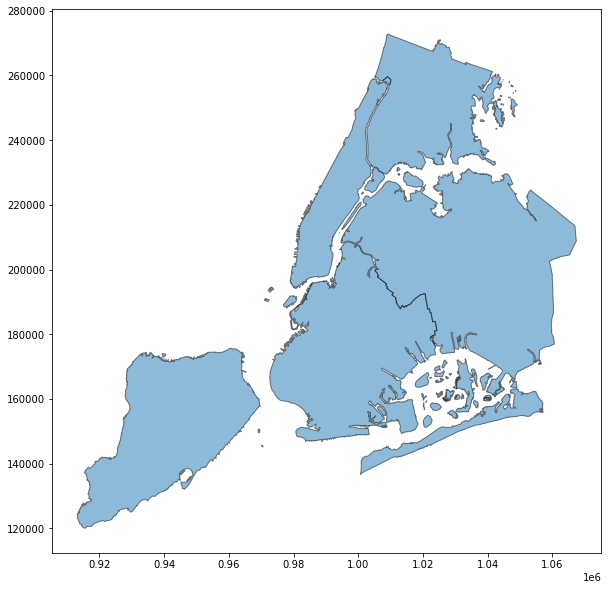

In [3]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [4]:
df = df.to_crs(epsg=3857)

In [5]:
import contextily as ctx

Add background tiles to plot
============================

We can use `add_basemap` function of contextily to easily add a background
map to our plot. :



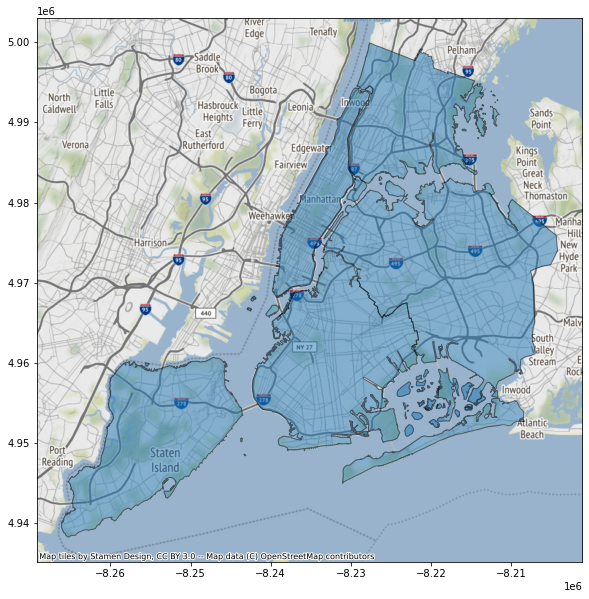

In [6]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

We can control the detail of the map tiles using the optional `zoom` keyword
(be careful to not specify a too high `zoom` level,
as this can result in a large download).:



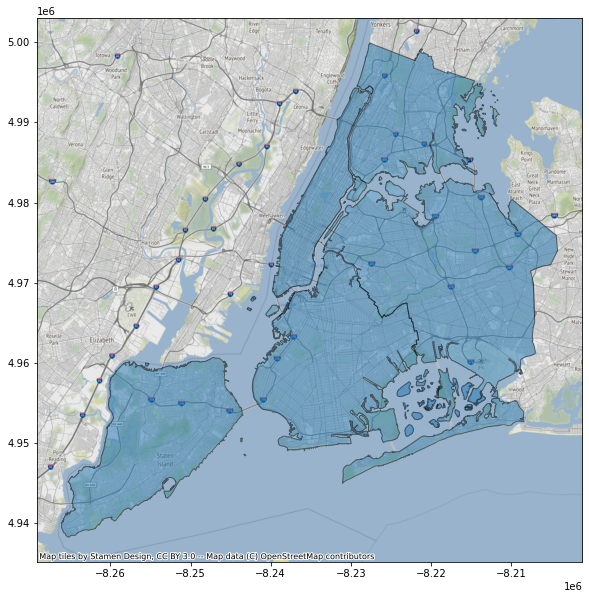

In [7]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.providers``:



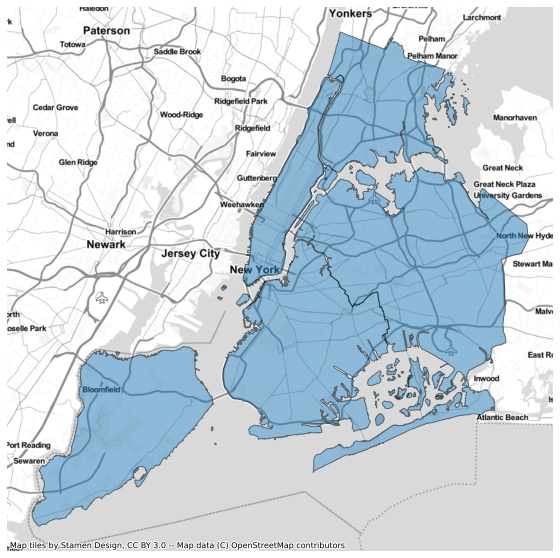

In [10]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()